# Chaining generators through pipelines

This tutorial shows how to chain different generators using the provided Pipeline class.

Beware, this pipeline class is not compatible with the sklearn Pipeline class

In [1]:
from sklearn.datasets import make_blobs
from badgers.generators.tabular_data.noise import GaussianNoiseGenerator
from badgers.generators.tabular_data.imbalance import RandomSamplingClassesGenerator
from badgers.core.pipeline import Pipeline
import matplotlib.pyplot as plt
from numpy.random import default_rng
import numpy as np

## Load data

Here we simply genrate fake data using `make_blobs` from scikit-learn (see [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs))

In [2]:
X, y = make_blobs(centers=4, random_state=0, cluster_std=0.6)

## Chaining the generators

In [3]:
rng = default_rng(0)
generators = {
    'imbalance': RandomSamplingClassesGenerator(random_generator=rng, proportion_classes={0:0.6, 1:0.25, 2:0.1, 3:0.05}),
    'noise': GaussianNoiseGenerator(random_generator=rng, noise_std=0.5)
}

pipeline = Pipeline(generators=generators)

Xt, yt = pipeline.generate(X.copy(),y)

## Visualization

Here is some code to visualize both the original and the transformed data

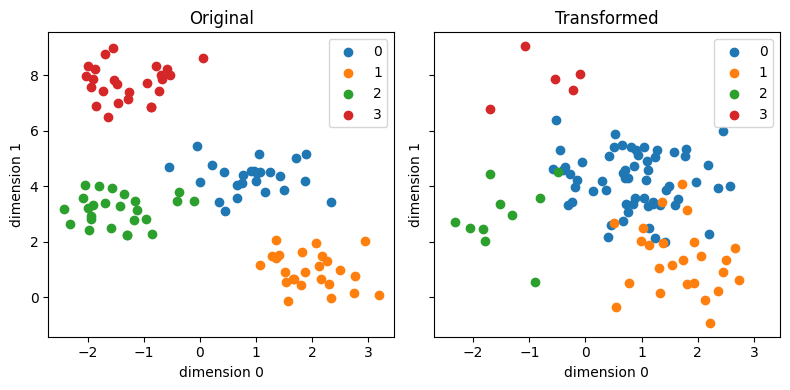

In [4]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8,4))
for label in np.unique(y):
    ix = np.where(y == label)[0]
    axes[0].scatter(X[ix,0], X[ix,1], c=f'C{label}', label=f'{label}')
for label in np.unique(yt):
    ix = np.where(yt == label)[0]
    axes[1].scatter(Xt[ix,0], Xt[ix,1], c=f'C{label}', label=f'{label}')

axes[0].set_title('Original')
axes[1].set_title('Transformed')
axes[0].set_xlabel('dimension 0', fontsize=10)
axes[1].set_xlabel('dimension 0', fontsize=10)
axes[0].set_ylabel('dimension 1', fontsize=10)
axes[1].set_ylabel('dimension 1', fontsize=10)
axes[0].legend()
axes[1].legend()
plt.tight_layout();

## Visualizing the number of instances for all classs

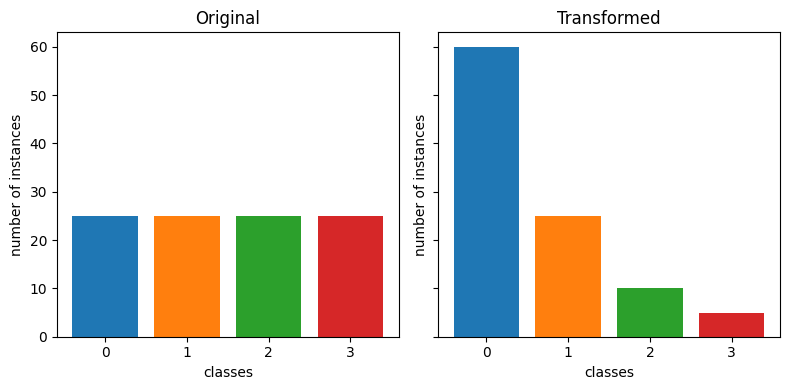

In [5]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8,4))

classes, nb = np.unique(y, return_counts=True)
axes[0].bar(classes, nb, color=[f'C{i}' for i in range(len(classes))])
axes[0].set_xlabel('classes')
axes[0].set_ylabel('number of instances')

classes_t, nb_t = np.unique(yt, return_counts=True)
axes[1].bar(classes_t, nb_t, color=[f'C{i}' for i in range(len(classes_t))])
axes[1].set_xlabel('classes')
axes[1].set_ylabel('number of instances')

axes[0].set_title('Original')
axes[1].set_title('Transformed')
plt.tight_layout();